
<p align="center"><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true"></p><h1><font color='0B5345'> <center>

Informática II

 </center></font></h1>
<h2><font color='0B5345'> <center>
Parcial II: Computación numérica en python</center></font></h2>
<font  face="Courier New" size="3">

<p3><center><b><font color='0B5345' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia - Bioingeniería</font></b> </center></p3>




Nombre: Luciana Acevedo Cadavid

Cédula: 1017923340


Antes de iniciar leer cuidadosamente cada enunciado antes de responder y asegurarse de comprender completamente lo que se está solicitando. 

¡Buena suerte!

1. (50%) La electromiografía (EMG) es una técnica ampliamente utilizada en medicina y fisiología para estudiar la actividad eléctrica de los músculos. Esta actividad, conocida como electromiograma (EMG), se registra mediante electrodos colocados sobre la piel o dentro del músculo, y proporciona información valiosa sobre el funcionamiento del sistema neuromuscular.

Instrucciones:

Utilizando programación orientada a objetos, cargue dos archivos de señales de EMG que contenga datos de varios electrodos (canales).

- Cree un método que muestre la información de la señal, que describa la forma de la señal y sus dimensiones (ejemplo: número de puntos de tiempo y el número de canales)

- Defina un método que sea capaz de graficar cada par de canales de EMG en un subplot con un tamaño adecuado. El número de canales es par, por lo tanto debe organizar los subplots en una matriz de dimensiones (numerodecanales/2, numerodecanales/2). Cada canal debe tener un color distinto en el gráfico.

- Los gráficos deben tener títulos, labels, cuadrícula, nombres en los ejes y cambios en el grosor de la línea.
- Debe permitir al usuario ingresar los límites del eje x a graficar.
- En este caso el gráfico es datos vs tiempo

- Defina un método que identifique y muestre la información del valor máximo de amplitud de la señal por cada canal y archivo.

- Cree un método adicional que grafique una señal que represente el promedio de todos los canales de un archivo. Esta señal promedio debe tener un estilo de línea diferente y estar en un gráfico separado.

In [2]:
import scipy.io as sio
import matplotlib.pyplot as plt

path1=r"C:\Users\lucia\OneDrive\Escritorio\Info_2\archivo1.mat"
archivo_s1 = sio.loadmat(path1)
path2=r"C:\Users\lucia\OneDrive\Escritorio\Info_2\archivo2.mat"
archivo_s2 = sio.loadmat(path2)

print(f'La variable cargada es del tipo: {type(archivo_s1)}') 
print(f'las llaves son: {archivo_s1.keys()}') 
print(f'La variable cargada es del tipo: {type(archivo_s2)}') 
print(f'las llaves son: {archivo_s2.keys()}') 

La variable cargada es del tipo: <class 'dict'>
las llaves son: dict_keys(['__header__', '__version__', '__globals__', 'tiempo', 'datos'])
La variable cargada es del tipo: <class 'dict'>
las llaves son: dict_keys(['__header__', '__version__', '__globals__', 'tiempo', 'datos'])


In [14]:
a=archivo_s1[list(archivo_s1.keys())[-1]]
b=archivo_s2[list(archivo_s2.keys())[-1]]
print ("archivo_s1:",a)
print("archivo_s2:",b)


archivo_s1: [[ 1.e-05  1.e-05 -1.e-05 ... -1.e-05 -1.e-05 -1.e-05]
 [-2.e-05 -2.e-05  1.e-05 ...  1.e-05  1.e-05  1.e-05]
 [-1.e-05 -1.e-05  2.e-05 ... -5.e-05 -5.e-05 -5.e-05]
 ...
 [-1.e-05 -1.e-05 -2.e-05 ... -1.e-05 -1.e-05 -1.e-05]
 [ 0.e+00  0.e+00 -1.e-05 ... -1.e-05 -1.e-05 -1.e-05]
 [-1.e-05 -1.e-05  1.e-05 ... -4.e-05 -4.e-05 -4.e-05]]
archivo_s2: [[-1.e-05 -1.e-05 -1.e-05 ... -1.e-05 -1.e-05 -1.e-05]
 [-4.e-05 -4.e-05 -4.e-05 ...  1.e-05  1.e-05  1.e-05]
 [-2.e-05 -2.e-05 -2.e-05 ... -1.e-05 -1.e-05 -1.e-05]
 ...
 [-1.e-05 -1.e-05 -1.e-05 ... -2.e-05 -2.e-05 -2.e-05]
 [ 1.e-05  1.e-05  1.e-05 ...  0.e+00  0.e+00  0.e+00]
 [-3.e-05 -3.e-05 -3.e-05 ... -3.e-05 -3.e-05 -3.e-05]]


In [15]:
ultima_clave = list(archivo_s1.keys())

ultima_clave[-1]

'datos'

In [39]:
senal = archivo_s1['datos'] #asigna la varuable data del diccionario a la senal
print("dimensión: ",senal.ndim) 
print("Forma: ",senal.shape)

dimensión:  2
Forma:  (8, 63196)


Datos cargados exitosamente.


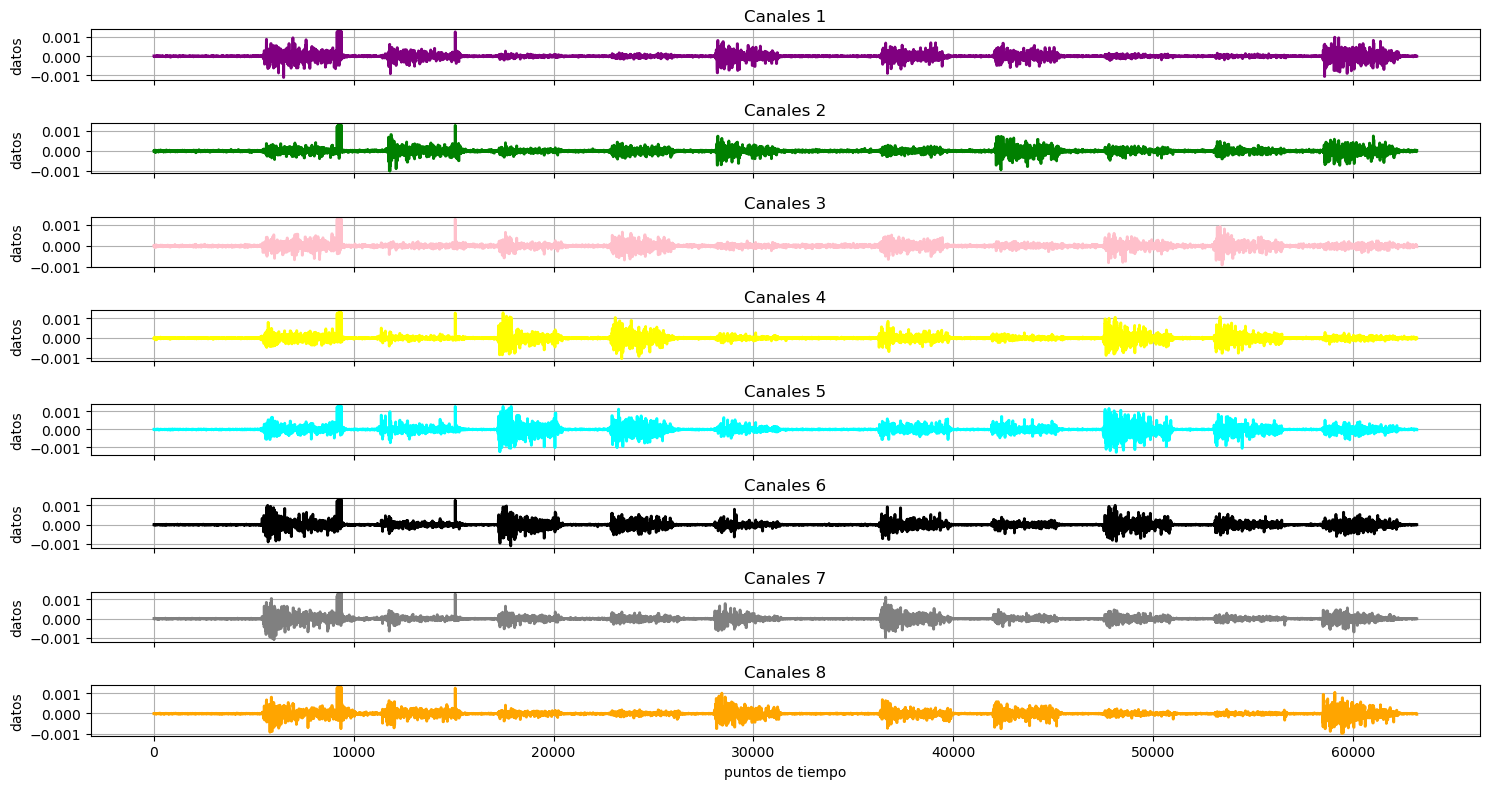

Información de la señal EMG:
Número de canales: 8
Número de puntos de tiempo: 63196
Forma de la señal: (8, 63196)
Índice del valor máximo del archivo 1: 9160
Valor máximo: 0.00127
Índice del valor máximo del archivo 2: 9765
Valor máximo: 0.00112


In [54]:
import numpy as np
class EMG:
    def __init__(self):
        self.data=[] #lista vacía para almacenar los datos
        self.colores = ['purple', 'green', 'pink','yellow', 'cyan', 'black', 'gray', 'orange']
        self.num_canales=None
        self.num_puntos_tiempo = None

    def cargar_datos(self, archivos):
        archivo1=sio.loadmat(archivos[0]) # cargar los datos del primer archivo
        datos1=archivo1[list(archivo1.keys())[-1]]
        self.data.append(datos1) #carga los datos  y los agrega a la lista self.data

        archivo2=sio.loadmat(archivos[1]) #cargar los datos del segundo archivo
        datos2=archivo2[list(archivo2.keys())[-1]]
        self.data.append(datos2) #carga los datos  y los agrega a la lista self.data

        self.num_canales = self.data[0].shape[0] # se calcula numero de canales basado en la forma de los datos
        self.num_puntos_tiempo = self.data[0].shape[1]
        print("Datos cargados exitosamente.")

    def info_senal(self): # información de la señal
        print("Información de la señal EMG:")
        print(f"Número de canales: {self.num_canales}")
        print(f"Número de puntos de tiempo: {self.num_puntos_tiempo}")
        print(f"Forma de la señal: {self.data[0].shape}") 

    def canales(self):

        fig, axs = plt.subplots(self.num_canales, 1, figsize=(15, 8), sharex=True)
        
        for i in range(self.num_canales):
            axs[i].plot(self.data[0][i], color=self.colores[i], linewidth=2)  # Asignar color y cambiar el grosor de la linea
            axs[i].set_title(f'Canales {i+1}')
            axs[i].set_ylabel('datos')
            axs[i].grid(True) #agregar cuadrícula
        
        axs[-1].set_xlabel('puntos de tiempo')
        plt.tight_layout()
        plt.show()
    
    def valor_max(self, canal): #información del valor máximo de amplitud de la señal por cada archivo
        senal = archivo_s1['datos'] #obtener los datos de una señal EMG en el archivo 1
        indice_max = np.argmax(senal[canal,:]) #índice del primer valor máximo a lo largo de un eje
        valor_max = np.max(senal[canal,:])

        senal2 = archivo_s2['datos'] #obtener los datos de una señal EMG en el archivo 2
        indice_max2 = np.argmax(senal2[canal,:])
        valor_max2 = np.max(senal2[canal,:])# valor máximo

        print(f"Índice del valor máximo del archivo 1: {indice_max}")
        print(f"Valor máximo: {valor_max}")
        print(f"Índice del valor máximo del archivo 2: {indice_max2}")
        print(f"Valor máximo: {valor_max2}")

# Uso del programa
analisis = EMG()
analisis.cargar_datos([path1, path2])
analisis.canales()
analisis.info_senal()
analisis.valor_max(0)
   


2. (20%) Utilice la librería NumPy para generar una serie de señales sinusoidales con las siguientes características:

- **Frecuencia de la señal: 1 Hz.**
- **Número de muestras: 1000.**
- **Rango de amplitud: entre 1 y 5 unidades.**

Genere un total de 5 señales sinusoidales, cada una con una amplitud aleatoria dentro del rango especificado.

Utilice la librería Matplotlib para graficar las 5 señales sinusoidales en una misma figura y cada señal debe estar etiquetada con su respectiva amplitud en la leyenda.

Incluya etiquetas adecuadas en los ejes x e y de la figura, así como un título descriptivo.

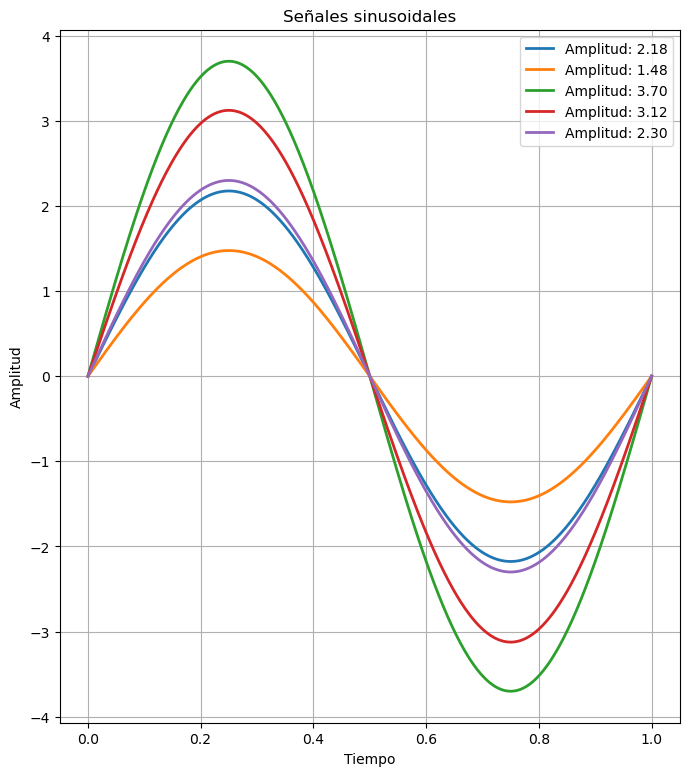

In [70]:
import numpy as np
import matplotlib.pyplot as plt

f = 1 
senales = 5

amplitud = np.random.uniform(1, 5, senales) # Amplitud aleatoria dentro del rango 1 y 5 unidades
#uniform permite generar números aleatorios a partir de una distribución uniforme

eje_x = np.linspace(0, 1, 1000) # Número de muestras=1000

plt.figure(figsize=(8, 9))
for i in range(senales): 
    eje_y = amplitud[i] * np.sin(2 * np.pi * f * eje_x) #La fórmula general para una señal sinusoidal
    plt.plot(eje_x, eje_y, label=f'Amplitud: {amplitud[i]:.2f}', linewidth=2) # con dos flotantes

plt.title('Señales sinusoidales')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

3. (30%) Cargue el conjunto de datos de dispositivos médicos desde el archivo CSV 'datos_dispositivos.csv' utilizando la biblioteca Pandas.
Realice un análisis exploratorio de los datos utilizando métodos y funciones de Pandas: 

- Muestre las primeras filas del DataFrame para entender su estructura.
- Verifique la información básica del DataFrame, como el número de filas y columnas, los tipos de datos de cada columna y la presencia de valores nulos.
- Filtre el dataframe según la clasificación de riesgo de los dispositivos y cree un nuevo dataframe para cada uno de ellos.
- Por medio de filtros y métodos de pandas identifique los diferentes fabricantes de los dispositivos de la bases de datos y cuantos dispositivos corresponden a cada uno de los fabricantes.

In [73]:
import numpy as np
import pandas as pd
import os
import glob

current = os.getcwd()
file = glob.glob(current+'/*.csv')
file

['c:\\Users\\lucia\\OneDrive\\Escritorio\\Info_2\\datos_dispositivos.csv']

In [76]:
#Cargar los datos- DataFrame
dispositivos_medicos = pd.read_csv('c:\\Users\\lucia\\OneDrive\\Escritorio\\Info_2\\datos_dispositivos.csv')
dispositivos_medicos

,ID,Nombre_dispositivo,Fabricante,Clasificacion_riesgo
0,1,Monitor de signos vitales,MedTech,Bajo
1,2,Desfibrilador,LifeCare,Moderado
2,3,Electrocardiograma,CardioTech,Alto
3,4,Respirador,RespiraCorp,Bajo
4,5,Bomba de infusión,InfuseCo,Moderado
5,6,Monitor de gases en sangre,CardioTech,Alto
6,7,Bomba de insulina intravenosa,CardioTech,Alto
7,8,Monitor de ritmo cardíaco,CardioTech,Bajo
8,9,Monitor de signos vitales neonatal,MedTech,Bajo
9,10,Monitor de gases en sangre,RespiraCorp,Bajo


In [108]:
filas = dispositivos_medicos.loc[:4] #primeras filas del DataFrame hasta la fila 5
print(filas)

#información básica del DataFrame
dimensiones=dispositivos_medicos.shape #filas y columnas
columnas=dispositivos_medicos.dtypes #tipo de datos de las columnas
print('---------------------------------')
print('Las dimensiones del DataFrame son:', dimensiones)
print('Los tipos de datos en las columnas son:')
print(columnas)


   ID         Nombre_dispositivo   Fabricante Clasificacion_riesgo
0   1  Monitor de signos vitales      MedTech                 Bajo
1   2              Desfibrilador     LifeCare             Moderado
2   3         Electrocardiograma   CardioTech                 Alto
3   4                 Respirador  RespiraCorp                 Bajo
4   5          Bomba de infusión     InfuseCo             Moderado
---------------------------------
Las dimensiones del DataFrame son: (30, 4)
Los tipos de datos en las columnas son:
ID                       int64
Nombre_dispositivo      object
Fabricante              object
Clasificacion_riesgo    object
dtype: object


In [105]:
#La clasificación de riesgo contiene: Bajo, Moderado y Alto.
#Filtrar y guardar en nuevos Dataframes

bajo = dispositivos_medicos[(dispositivos_medicos['Clasificacion_riesgo'] == 'Bajo')]
moderado = dispositivos_medicos[(dispositivos_medicos['Clasificacion_riesgo'] == 'Moderado')]
alto = dispositivos_medicos[(dispositivos_medicos['Clasificacion_riesgo'] == 'Alto')]

print(bajo) #bajo sería un nuevo DataFrame
print('------------------------------------')
print(moderado)
print('------------------------------------')
print(alto)

    ID                  Nombre_dispositivo   Fabricante Clasificacion_riesgo
0    1           Monitor de signos vitales      MedTech                 Bajo
3    4                          Respirador  RespiraCorp                 Bajo
7    8           Monitor de ritmo cardíaco   CardioTech                 Bajo
8    9  Monitor de signos vitales neonatal      MedTech                 Bajo
9   10          Monitor de gases en sangre  RespiraCorp                 Bajo
10  11        Bomba de infusión de morfina      MedTech                 Bajo
11  12      Electrocardiógrafo ambulatorio     InfuseCo                 Bajo
16  17            Desfibrilador pediátrico     LifeCare                 Bajo
17  18            Desfibrilador pediátrico      MedTech                 Bajo
21  22                Desfibrilador manual      MedTech                 Bajo
23  24   Bomba de infusión de medicamentos      MedTech                 Bajo
24  25                   Bomba de insulina     LifeCare                 Bajo

In [112]:
#identificar los diferentes fabricantes de los dispositivos de la bases de datos
# y cuantos dispositivos corresponden a cada uno de los fabricantes

f1 = dispositivos_medicos[(dispositivos_medicos['Fabricante'] == 'MedTech')]
f2 = dispositivos_medicos[(dispositivos_medicos['Fabricante'] == 'LifeCare')]
f3 = dispositivos_medicos[(dispositivos_medicos['Fabricante'] == 'CardioTech ')]
f4 = dispositivos_medicos[(dispositivos_medicos['Fabricante'] == 'RespiraCorp')]
f5 = dispositivos_medicos[(dispositivos_medicos['Fabricante'] == 'InfuseCo')]

print("Cantidad de dispositivos en: MedTech")
print(f1)
print('-------------------------------------------------')
print("Cantidad de dispositivos en: LifeCare")
print(f2)
print('-------------------------------------------------')
print("Cantidad de dispositivos en: CardioTech")
print(f3)
print('-------------------------------------------------')
print("Cantidad de dispositivos en: RespiraCorp")
print(f4)
print('-------------------------------------------------')
print("Cantidad de dispositivos en: InfuseCo")
print(f5)

Cantidad de dispositivos en: MedTech
    ID                  Nombre_dispositivo Fabricante Clasificacion_riesgo
0    1           Monitor de signos vitales    MedTech                 Bajo
8    9  Monitor de signos vitales neonatal    MedTech                 Bajo
10  11        Bomba de infusión de morfina    MedTech                 Bajo
15  16                Desfibrilador manual    MedTech             Moderado
17  18            Desfibrilador pediátrico    MedTech                 Bajo
21  22                Desfibrilador manual    MedTech                 Bajo
23  24   Bomba de infusión de medicamentos    MedTech                 Bajo
25  26              Desfibrilador portátil    MedTech             Moderado
26  27                Desfibrilador manual    MedTech                 Alto
-------------------------------------------------
Cantidad de dispositivos en: LifeCare
    ID              Nombre_dispositivo Fabricante Clasificacion_riesgo
1    2                   Desfibrilador   LifeCare     

In [113]:
fabricantes = dispositivos_medicos['Fabricante'].value_counts() #otra manera de sacar más rapido el numero de dispositivos
print("Cantidad de dispositivos por fabricante:")
print(fabricantes)

Cantidad de dispositivos por fabricante:
MedTech        9
CardioTech     9
LifeCare       7
RespiraCorp    3
InfuseCo       2
Name: Fabricante, dtype: int64


**Éxitos y recuerden que la entrega del parcial se realiza subiendo este notebook a su repositorio de github.**